In [1]:
# pandas,numpy
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# model selection,Counter
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc,precision_score
from collections import Counter

In [2]:
#Read train & test data as a DataFrame
data=pd.read_csv("E:/kaggle_data/Loan_Approval/train_data.csv")
kaggle=pd.read_csv("E:/kaggle_data/Loan_Approval/test_data.csv")

In [3]:
#preview the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()
print("----------------------------")
kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null objec

In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#Extract Target variable and Concatenate Our data
data.loc[:,'Approval']=0
data.loc[data['Loan_Status']=='Y','Approval']=1
y=data['Approval']
data=data.drop(['Loan_Status','Approval'],axis=1)
full=pd.concat([data,kaggle])
full.index=range(981)

In [7]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction

ID=kaggle['Loan_ID']
del full['Loan_ID']

In [8]:
# null value prediction
def null_predict(data):
    total=data.isnull().sum().sort_values(ascending=False)    
    percentage=((data.isnull().sum()*100)/data.isnull().count()).sort_values(ascending=False)
    missing=pd.concat([total,percentage],axis=1,keys=['Total','Percent'])
    return missing    
null_predict(data)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000
ApplicantIncome,0,0.000000


In [9]:
temp=pd.concat([data,y],axis=1)

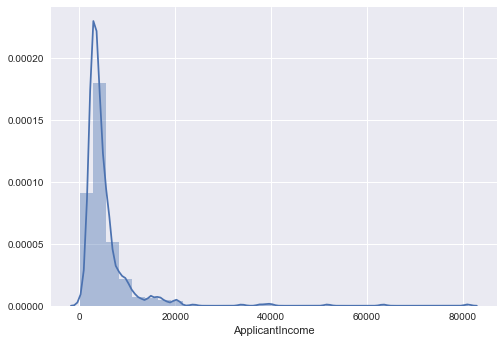

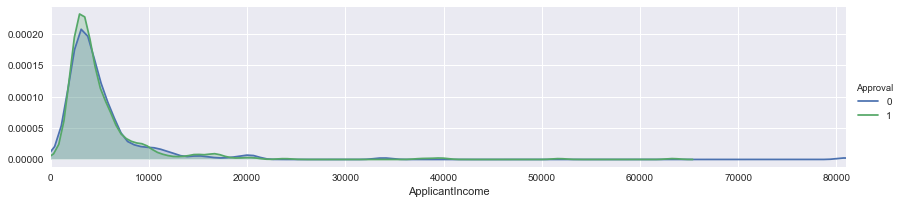

In [10]:
# Distribution plot
sns.distplot(data['ApplicantIncome'],bins=30)
plt.show()


# KDE distribution over Age with income 0&1
plt.figure(figsize=(16,6))
facet = sns.FacetGrid(data=temp, hue="Approval",aspect=4)
facet.map(sns.kdeplot,'ApplicantIncome',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['ApplicantIncome'].max()))
plt.show()

2500-4700

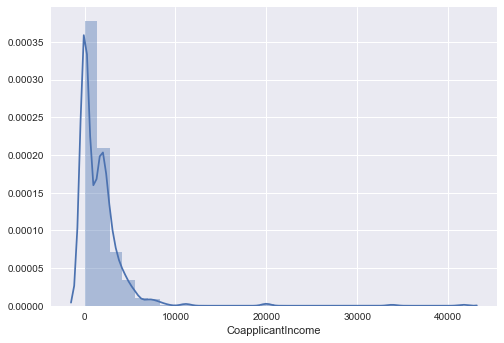

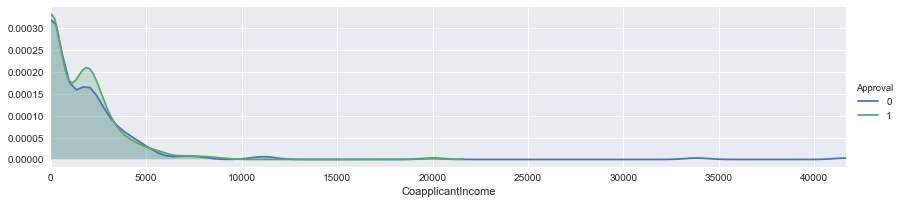

In [11]:
# Distribution plot
sns.distplot(data['CoapplicantIncome'],bins=30)
plt.show()


# KDE distribution over Age with income 0&1

facet = sns.FacetGrid(data=temp, hue="Approval",aspect=4)
facet.map(sns.kdeplot,'CoapplicantIncome',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['CoapplicantIncome'].max()))
plt.show()

1000-3000

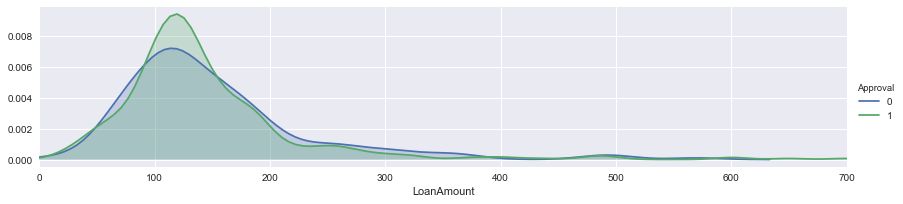

In [12]:
# KDE distribution over Age with income 0&1
facet = sns.FacetGrid(data=temp, hue="Approval",aspect=4)
facet.map(sns.kdeplot,'LoanAmount',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['LoanAmount'].max()))
plt.show()

90-150

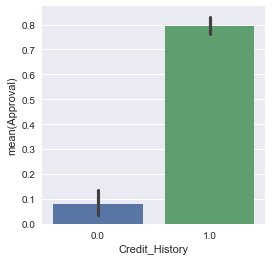

In [13]:
plt.figure(figsize=(4,4))
sns.barplot(x='Credit_History',y='Approval',data=temp)
plt.show()

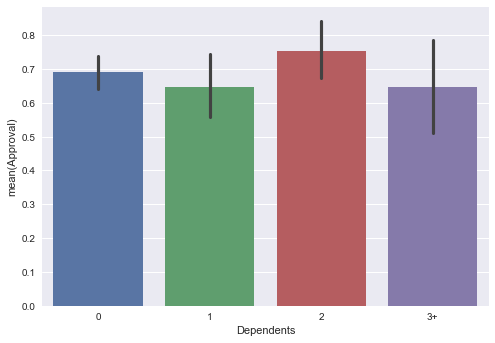

In [14]:
sns.barplot(x='Dependents',y='Approval',data=temp)
plt.show()

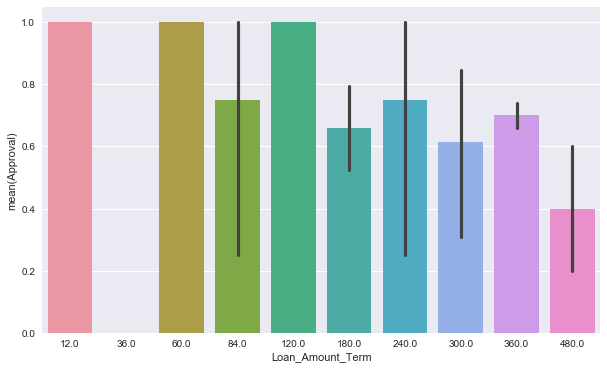

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='Loan_Amount_Term',y='Approval',data=temp)
plt.show()

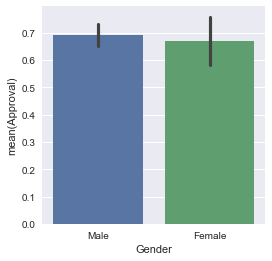

In [16]:
plt.figure(figsize=(4,4))
sns.barplot(x='Gender',y='Approval',data=temp)
plt.show()

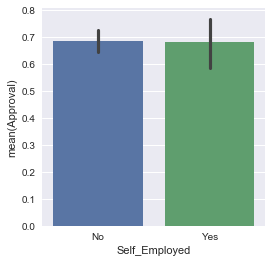

In [17]:
plt.figure(figsize=(4,4))
sns.barplot(x='Self_Employed',y='Approval',data=temp)
plt.show()

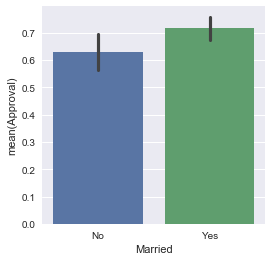

In [18]:
plt.figure(figsize=(4,4))
sns.barplot(x='Married',y='Approval',data=temp)
plt.show()

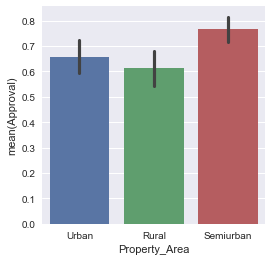

In [19]:
plt.figure(figsize=(4,4))
sns.barplot(x='Property_Area',y='Approval',data=temp)
plt.show()

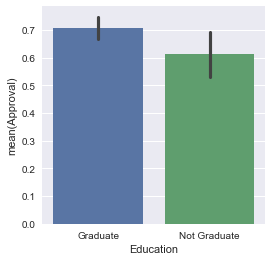

In [20]:
plt.figure(figsize=(4,4))
sns.barplot(x='Education',y='Approval',data=temp)
plt.show()

In [21]:
##OUTLIER DETECTION
 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

In [22]:
Outliers_to_drop = detect_outliers(data,2,["ApplicantIncome","CoapplicantIncome","LoanAmount"])
Outliers_to_drop

[]

In [23]:
# Create new feature "Gender1"
temp['Gender1']=np.nan
temp.loc[temp['Gender']=='Male','Gender1']=0 
temp.loc[temp['Gender']=='Female','Gender1']=1
temp.Gender1.value_counts(dropna=False)

 0.0    489
 1.0    112
NaN      13
Name: Gender1, dtype: int64

In [24]:
# Create new feature "Married1"
temp.loc[:,'Married1']=0
temp.loc[temp['Married']=='Yes','Married1']=1
temp.Married1.value_counts(dropna=False)

1    398
0    216
Name: Married1, dtype: int64

In [25]:
# Create new feature "Education1"
temp.loc[:,'Education1']=0
temp.loc[temp['Education']=='Graduate','Education1']=1
temp.Education1.value_counts(dropna=False)

1    480
0    134
Name: Education1, dtype: int64

In [26]:
# Create new feature "Employed"
temp['Employed']=np.nan
temp.loc[temp['Self_Employed']=='No','Employed']=0
temp.loc[temp['Self_Employed']=='Yes','Employed']=1
temp.Employed.value_counts(dropna=False)

 0.0    500
 1.0     82
NaN      32
Name: Employed, dtype: int64

In [27]:
# Create new feature "Property"
temp['Property']=0
temp.loc[temp['Property_Area']=='Semiurban','Property']=1
temp.loc[temp['Property_Area']=='Urban','Property']=2
temp.Property.value_counts(dropna=False)

1    233
2    202
0    179
Name: Property, dtype: int64

In [28]:
# Create new feature "dependent"
temp.loc[:,'dependent']=0
temp.loc[temp['Dependents']=='1','dependent']=1
temp.loc[temp['Dependents']=='2','dependent']=2
temp.loc[temp['Dependents']=='3+','dependent']=3
temp.dependent.value_counts(dropna=False)

0    360
1    102
2    101
3     51
Name: dependent, dtype: int64

In [29]:
temp.loc[:,'appl_income']=0
temp.loc[(temp.ApplicantIncome>=2500)&(temp.ApplicantIncome>=4700),'appl_income']=1

In [30]:
temp.loc[:,'coappl_income']=0
temp.loc[(temp.CoapplicantIncome>=1000)&(temp.CoapplicantIncome>=3000),'coappl_income']=1

In [31]:
temp.loc[:,'LoanAmt']=0
temp.loc[(temp.LoanAmount>=90)&(temp.LoanAmount>=150),'LoanAmt']=1
temp.loc[temp.LoanAmount.isnull(),'LoanAmt']=np.nan

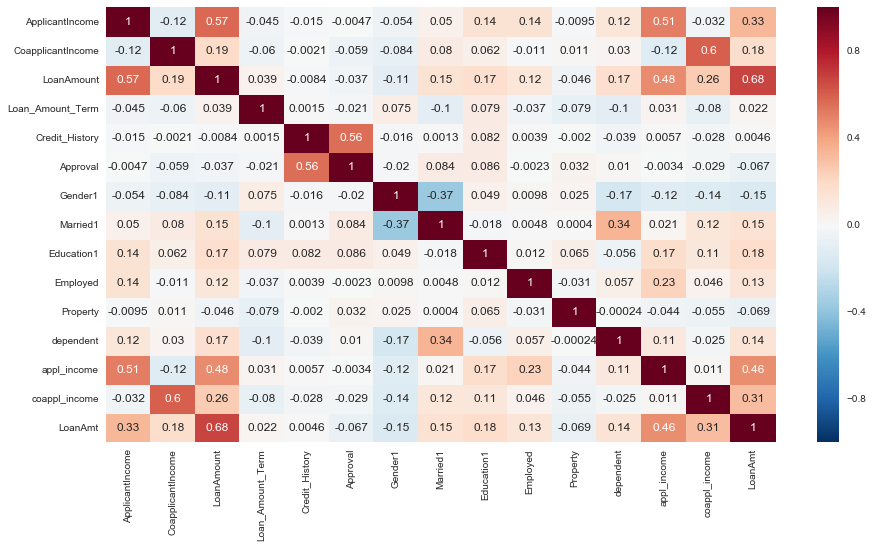

In [32]:
# Pearson Correlation
corra=temp.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(corra,annot=True)
plt.show()

In [33]:
# After some observation,we can say
full.loc[(full['Married'].isnull())&(full['Gender']=='Female'),'Married']='Yes'
full.loc[(full['Married'].isnull())&(full['Gender']=='Male')&(full['Property_Area']=='Semiurban'),'Married']='Yes'
full.loc[(full['Married'].isnull())&(full['Gender']=='Male')&(full['Property_Area']=='Urban'),'Married']='No'

In [34]:
full.loc[((full['Education']=='Graduate') & (full['Self_Employed']=='No') & (full['Credit_History']==1.0) & (full['Dependents'].isnull())),:]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban
104,Male,No,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban
120,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural
228,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban
332,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban
355,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban
435,Female,Yes,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban
684,Female,No,NaN,Graduate,No,3250,0.0,95.0,360.0,1.0,Semiurban
725,Male,Yes,NaN,Graduate,No,4082,0.0,93.0,360.0,1.0,Semiurban
752,NaN,No,NaN,Graduate,No,3333,1250.0,110.0,360.0,1.0,Semiurban


In [35]:
# Fill NaN values in LoanAmount with Mean
indi=full.loc[full['LoanAmount'].isnull(),'LoanAmount'].index
full.loc[full['LoanAmount'].isnull(),'LoanAmount']=int(full['LoanAmount'].mean())

In [36]:
# Imputing null values for Gender

trt=full.loc[full['Gender'].notnull(),['Married','Dependents']]
tst=full.loc[full['Gender'].isnull(),['Married','Dependents']]
yr=full.loc[full['Gender'].notnull(),'Gender']
tr=pd.get_dummies(trt)
ts=pd.get_dummies(tst)

model=KNC()
model.fit(tr,yr)
pred=model.predict(ts)
print(pred)
full.loc[full['Gender'].isnull(),'Gender']=pred

['Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male'
 'Male' 'Male' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male'
 'Male' 'Male' 'Male' 'Male' 'Male']


In [37]:
# Imputing null values for Self Employed

trt2=full.loc[full['Self_Employed'].notnull(),['ApplicantIncome','LoanAmount','Property_Area']]
tst2=full.loc[full['Self_Employed'].isnull(),['ApplicantIncome','LoanAmount','Property_Area']]
yr2=full.loc[full['Self_Employed'].notnull(),'Self_Employed']
tr2=pd.get_dummies(trt2)
ts2=pd.get_dummies(tst2)

model2=KNC()
model2.fit(tr2,yr2)
pred2=model2.predict(ts2)
print(pred2)
full.loc[full['Self_Employed'].isnull(),'Self_Employed']=pred2

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No']


In [38]:
# Imputing null values for Dependents

trt3=full.loc[full['Dependents'].notnull(),['Married','Gender','LoanAmount','ApplicantIncome']]
tst3=full.loc[full['Dependents'].isnull(),['Married','Gender','LoanAmount','ApplicantIncome']]
yr3=full.loc[full['Dependents'].notnull(),'Dependents']
tr3=pd.get_dummies(trt3)
ts3=pd.get_dummies(tst3)

model3=KNC()
model3.fit(tr3,yr3)
pred3=model3.predict(ts3)
print(pred3)
full.loc[full['Dependents'].isnull(),'Dependents']=pred3

['0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '1' '0' '0' '0']


In [39]:
# Imputing null values for Loan_Amount_Term

trt4=full.loc[full['Loan_Amount_Term'].notnull(),['Gender','LoanAmount','Dependents','Married']]
tst4=full.loc[full['Loan_Amount_Term'].isnull(),['Gender','LoanAmount','Dependents','Married']]
yr4=full.loc[full['Loan_Amount_Term'].notnull(),'Loan_Amount_Term']
tr4=pd.get_dummies(trt4)
ts4=pd.get_dummies(tst4)
del tr4['Dependents_2']

model4=KNR()
model4.fit(tr4,yr4)
pred4=model4.predict(ts4)
print(pred4)
full.loc[full['Loan_Amount_Term'].isnull(),'Loan_Amount_Term']=pred4

[ 324.   384.   360.   360.   384.   360.   324.   360.   312.   324.   252.
  312.   295.2  324.   324.   360.   312.   276.   360.   295.2]


In [40]:
# Imputing null values for Credit_History 

trt5=full.loc[full['Credit_History'].notnull(),['Education','Dependents','Self_Employed']]
tst5=full.loc[full['Credit_History'].isnull(),['Education','Dependents','Self_Employed']]
yr5=full.loc[full['Credit_History'].notnull(),'Credit_History']
tr5=pd.get_dummies(trt5)
ts5=pd.get_dummies(tst5)

model5=KNC()
model5.fit(tr5,yr5)
pred5=model5.predict(ts5)
print(pred5)
full.loc[full['Credit_History'].isnull(),'Credit_History']=pred5

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.
  1.  1.  0.  1.  1.  1.  1.]


In [41]:
full.loc[:,'LoanAmt']=0
full.loc[(full.LoanAmount>=90)&(full.LoanAmount>=150),'LoanAmt']=1

In [42]:
# null value prediction
def null_predict(data):
    total=data.isnull().sum().sort_values(ascending=False)    
    percentage=((data.isnull().sum()*100)/data.isnull().count()).sort_values(ascending=False)
    missing=pd.concat([total,percentage],axis=1,keys=['Total','Percent'])
    return missing    
null_predict(full)

,Total,Percent
LoanAmt,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


In [43]:
full=full.drop(['LoanAmount','Self_Employed','Gender','LoanAmt','Education'],axis=1)

In [44]:
full.head()

,Married,Dependents,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,No,0,5849,0.0,360.0,1.0,Urban
1,Yes,1,4583,1508.0,360.0,1.0,Rural
2,Yes,0,3000,0.0,360.0,1.0,Urban
3,Yes,0,2583,2358.0,360.0,1.0,Urban
4,No,0,6000,0.0,360.0,1.0,Urban


In [45]:
# Extraxt data drom full data

data=full.loc[0:613]
kaggle=full.loc[614:981]

In [46]:
# train-Test split & get dummy variables

train_x,test_x,train_y,test_y=train_test_split(data,y,test_size=0.33,random_state=2)
train_x=pd.get_dummies(train_x)
test_x=pd.get_dummies(test_x)

In [47]:
model=LogisticRegression()
model.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
# Score for train data

model.score(train_x,train_y)

0.81265206812652069

In [49]:
# Score for test data

model.score(test_x,test_y)

0.7931034482758621

In [50]:
predii=model.predict(test_x)

In [51]:
precision_score(y_true=test_y,y_pred=predii)

0.77906976744186052